In [286]:
%matplotlib inline

import seaborn as sns
import pickle

import numpy as np
import scipy as sp
import nibabel as nib
import pandas as pd
import cv2

from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
from scipy import misc

from sklearn import datasets
from sklearn.cluster import *
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.metrics import silhouette_samples, silhouette_score


sns.set(font_scale=1.4)
sns.set_style("whitegrid", {'axes.grid' : False})

In [287]:
nibfile = nib.load("/Users/hanam/Documents/tract_clustering_3/C1/Volume4D_sym_cleaned.nii.gz")
data = nibfile.get_data()

In [288]:
def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

In [289]:
feature_names = [
    "number_axons",
    "axon_equiv_diameter",
    "avf",
    "g_ratio",
    "myelin_thickness",
    "mvf",
]

In [290]:
data = data.transpose((1, 0, 2, 3))

# Ignore solidity, eccent., orient., etc.
#data = data[..., 0:6]
data = data.squeeze(axis=2)

In [291]:
data.shape

(151, 151, 6)

In [292]:
original_shape = data.shape[0:2]

print original_shape

(151, 151)


In [293]:
h1= 35
h2= 115
w1= 35
w2= 120

In [294]:
def colorbar(mappable):
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    return fig.colorbar(mappable, cax=cax)

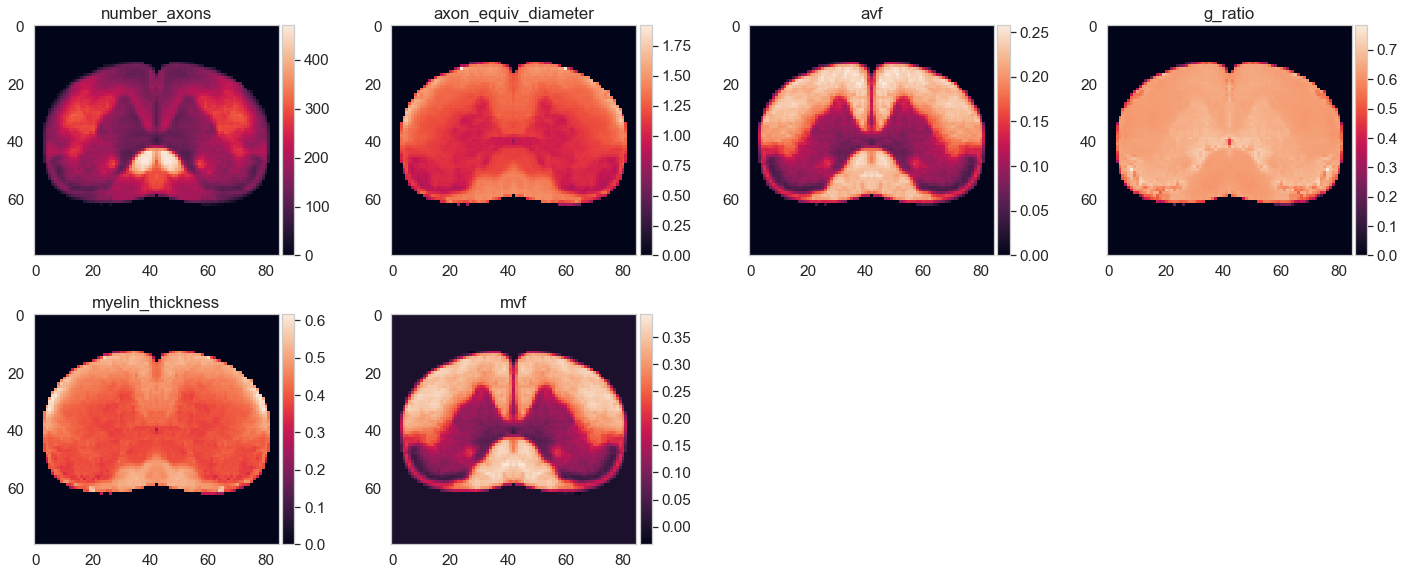

In [295]:
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i in range(1, data.shape[2]+1):
    im_crop= crop_center(data[...,i-1], w2-w1, h2-h1)
    ax = fig.add_subplot(5, 4, i)
    img = ax.imshow(im_crop)
    # Center line
    #ax.axvline(original_shape[1] // 2) 
    plt.title(feature_names[i-1])
    colorbar(img)

plt.tight_layout(h_pad=1)

In [296]:
connectivity = grid_to_graph(n_x=data.shape[0],
                             n_y=data.shape[1])

In [297]:
connectivity

<22801x22801 sparse matrix of type '<type 'numpy.int64'>'
	with 113401 stored elements in COOrdinate format>

In [298]:
data= data.reshape(-1, data.shape[2])

In [299]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [300]:
data.shape

(22801, 6)

# t-SNE

In [212]:
#data_embedded = TSNE(n_components=2, verbose=3, perplexity=40).fit_transform(data)

In [301]:
num_clusters = 14
clustering = AgglomerativeClustering(linkage="ward", n_clusters=num_clusters,
                                     connectivity=connectivity)
clustering.fit(data)
labels = clustering.labels_

silhouette= silhouette_score(data, labels)

In [302]:
labels.shape

(22801,)

In [303]:
data.shape

(22801, 6)

In [304]:
silhouette

0.8695894

In [305]:
labels = labels.reshape(*original_shape)

In [306]:
labels.shape

(151, 151)

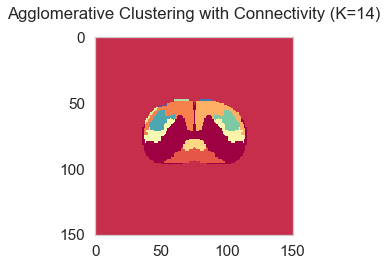

In [307]:
plt.imshow(labels, cmap="Spectral")
plt.title("Agglomerative Clustering with Connectivity (K={})".format(num_clusters), pad=18)
plt.tight_layout()

0.88791865
0.89034575
0.88890666
0.88899004
0.8828913
0.87990564
0.87358767
0.87369907
0.86990666
0.8695894
0.86217195
0.8618909
0.85307103
0.85350406
0.85549575
0.85497415
0.8557084
0.8556787
0.85436136
0.8547506
0.84472823
0.84541196
0.8457515
0.8464927
0.8463506


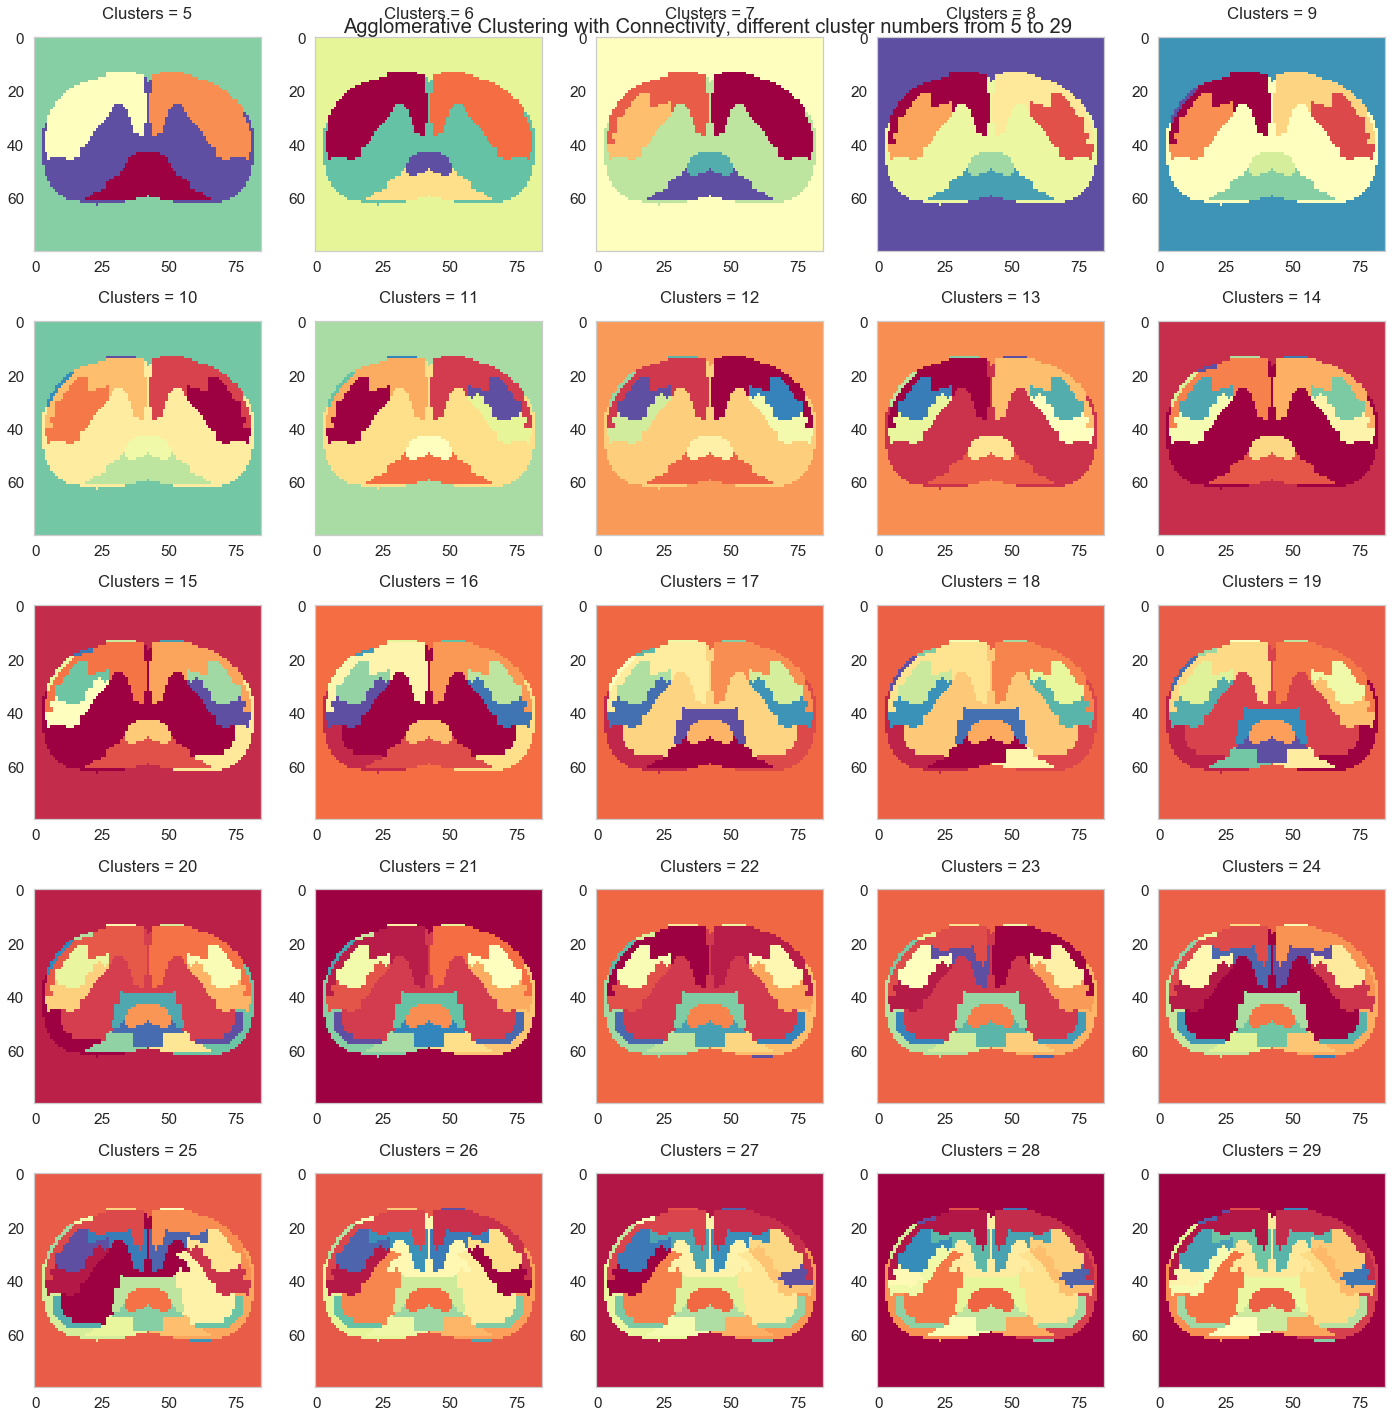

In [314]:
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i in range(1, 26):
    clustering = AgglomerativeClustering(linkage="ward", n_clusters=i+4,
                                         connectivity=connectivity)
    clustering.fit(data)
    labels = clustering.labels_
    silhouette= silhouette_score(data, labels)
    print silhouette

    
    
    labels = labels.reshape(*original_shape)    
    im_crop= crop_center(labels, w2-w1, h2-h1)

    ax = fig.add_subplot(5, 5, i)
    img = ax.imshow(im_crop, cmap="Spectral")
    plt.title("Clusters = {}".format(i+4), pad=18)
    plt.tight_layout()
    

plt.suptitle("Agglomerative Clustering with Connectivity, different cluster numbers from 5 to 29")
plt.tight_layout(h_pad=1)

# Validation of Clusters

In [ ]:
#Silhouette Score

In [ ]:
sklearn.metrics.silhouette_score(X, labels, metric=’euclidean’, sample_size=None, random_state=None, **kwds)